In [7]:
%load_ext autoreload
%autoreload 2

import logging

logging.basicConfig(level=logging.WARNING)
logging.getLogger('anonymigraph').setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from anonymigraph.anonymization import k_degree_anonymity
import networkx as nx
import numpy as np
from utils_notebooks import generate_power_law_graph

In [9]:
#G = nx.erdos_renyi_graph(1000, 50/1000)
G = generate_power_law_graph(num_nodes = 2000, exponent = 2) # K-Degree has problems on power law graphs

# Anonymize the Graph G
k = 100
Ga = k_degree_anonymity(G, k, noise=10, with_deletions=True, random_seed=31221)

Max Degree: 1251 - Median 1.0 - Mean 4.866
Attempt number 1
Attempt number 2
Attempt number 3
Attempt number 4
Attempt number 5
Attempt number 6
Attempt number 7
Attempt number 8
Attempt number 9
Attempt number 10
Attempt number 11
Attempt number 12
Attempt number 13
Attempt number 14
Attempt number 15
Attempt number 16
Attempt number 17
Attempt number 18
Attempt number 19
Attempt number 20
Attempt number 21
Attempt number 22
Attempt number 23
Attempt number 24
Attempt number 25
Attempt number 26
Attempt number 27
Attempt number 28
Attempt number 29
Attempt number 30
Attempt number 31
Attempt number 32
Attempt number 33
Attempt number 34
Attempt number 35
Attempt number 36
Attempt number 37
Attempt number 38
Attempt number 39
Attempt number 40
Attempt number 41
Attempt number 42
Attempt number 43
Attempt number 44
Attempt number 45
Attempt number 46
Attempt number 47
Attempt number 48
Attempt number 49
Attempt number 50
Attempt number 51
Attempt number 52
Attempt number 53
Attempt numb

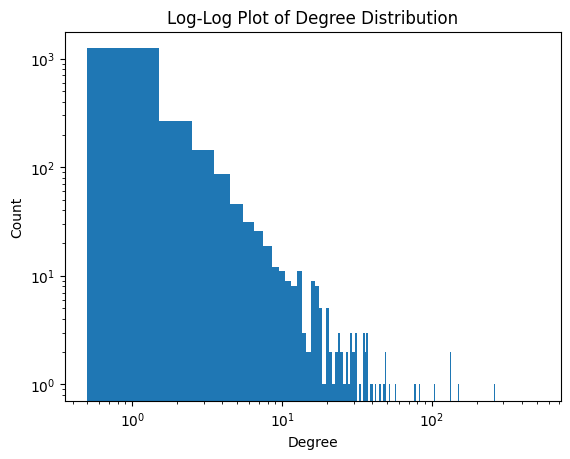

In [10]:
import matplotlib.pyplot as plt

def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(1, max(degrees)+1), density=False, log=True, align='left')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Plot of Degree Distribution')
    plt.show()

plot_degree_distribution(G)

In [11]:
from collections import Counter

def evaluate(graph, k):
    """Evaluates the level of k-anonymity on a graph."""

    degree_count = Counter(d for _, d in graph.degree())
    k_anonymous_nodes = sum(count for _, count in degree_count.items() if count >= k)

    print("-"*30)
    print(f"Number of edges: {graph.number_of_edges()}")
    print(f"Percentage of nodes that satisfy {k}-degree anonymity: {k_anonymous_nodes / graph.number_of_nodes():.3f}")
    print(f"Number of isolated nodes: {degree_count[0]}")

k_test = k + 0
evaluate(G, k_test)
evaluate(Ga, k_test)

------------------------------
Number of edges: 3758
Percentage of nodes that satisfy 100-degree anonymity: 0.828
Number of isolated nodes: 0
------------------------------
Number of edges: 3382
Percentage of nodes that satisfy 100-degree anonymity: 1.000
Number of isolated nodes: 0


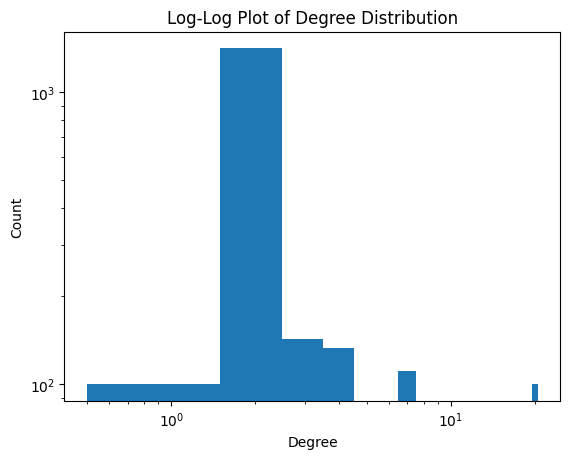

In [12]:
plot_degree_distribution(Ga)